In [1]:
!pip install keras

In [2]:
import keras
keras.__version__
import numpy as np

In [3]:
#영화 리뷰 데이터 가져오기
from keras.datasets import imdb
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=10000) #keras문법
# imdb.load_data() 전체 데이터를 다 가져옴= 분석 힘듬

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_label[0]

1

In [6]:
#원래 단어로 복원시켜주는 방법
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()

# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review
#긍정적인 리뷰같다, 단어를 숫자로 치환하고 숫자로 학습해서 맞추는 것, 1번은 긍정적, 0번은 부정으로

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# 원 윈 인코딩
1~10000개의 칸에 대해 
1을 포함하고 싶다면 0번째 칸만 1로 하고 나머지 9999개를 0으로
2를 포함하고 싶다면 1번쨰 칸만 1로 하고 나머지 9999개를 0으로 하는 방법

In [8]:
#0과 1로 이루어지는 매트릭스를 만드는것, 숫자 모양데이터를 만듬
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension)) #튜플 타입으로 표현해야됨, zero((행,열))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [9]:
x_train = vectorize_sequences(train_data) # 25000*10000개의 데이터 
x_test = vectorize_sequences(test_data)

In [10]:
y_train = np.asarray(train_label).astype('float32') #정수를 실수형으로 바꾸기
y_test = np.asarray(test_label).astype('float32')

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #16 * 10000
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #0 또는 1 = sigmoid
#input_shape는 첫번째에만 입력하면 밑은 알아서 적용
#레이어안의 뉴런갯수 16->2->16 으로는 불가, 무조건 갯수가 낮아져야함

In [12]:
from keras import losses
from keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), #학습량을 조절하는거랑 똑같은 역할함
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy]) #평가 지표

C:\Users\82106\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:] #10000~25000

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train, 
          partial_y_train,
          epochs=3,
          batch_size=512,
          validation_data=(x_val, y_val)) #검증작업 = 시간이 더 오래걸린다.

Epoch 1/3
30/30 [==============================] - 1s 27ms/step - loss: 0.4992 - binary_accuracy: 0.7917 - val_loss: 0.3735 - val_binary_accuracy: 0.8765
Epoch 2/3
30/30 [==============================] - 0s 13ms/step - loss: 0.2970 - binary_accuracy: 0.9057 - val_loss: 0.3080 - val_binary_accuracy: 0.8823
Epoch 3/3
30/30 [==============================] - 0s 12ms/step - loss: 0.2174 - binary_accuracy: 0.9287 - val_loss: 0.2913 - val_binary_accuracy: 0.8844


In [15]:
history_dict = history.history #실행했던 결과을 보여줌
history_dict.keys() #키 값 확인

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [16]:
import matplotlib.pyplot as plt

In [17]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

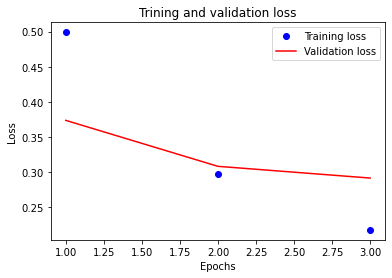

In [18]:
plt.plot(epochs, loss, 'bo', label='Training loss') #bo = 파란색 동그라미
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Trining and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

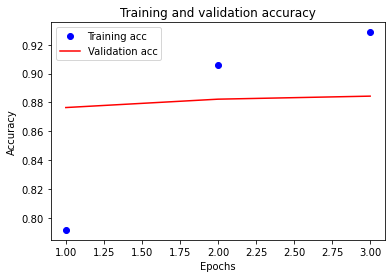

In [19]:
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'r-', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

In [20]:
results= model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 700us/step - loss: 0.3120 - binary_accuracy: 0.8726


In [21]:
results

[0.31197139620780945, 0.8726000189781189]

In [22]:
model.predict(x_test)

array([[0.23821267],
       [0.992504  ],
       [0.7848668 ],
       ...,
       [0.08554447],
       [0.11245981],
       [0.3211413 ]], dtype=float32)

range(1, 20)
